# Solo Gym Environment Rendering w/ Jupyter
This notebook gives a working example of how one would render the environment for debugging / monitoring

## Environment Setup
Quickly get a basic environment up and running

Import environment modules

In [1]:
import gym
import numpy as np

from gym_solo.envs import solo8v2vanilla
from gym_solo.core import obs
from gym_solo.core import rewards
from gym_solo.core import termination as terms

Set up the environment

In [2]:
config = solo8v2vanilla.Solo8VanillaConfig()
env = gym.make('solo8vanilla-v0', config=config)

env.obs_factory.register_observation(obs.TorsoIMU(env.robot))
env.reward_factory.register_reward(1,rewards.UprightReward(env.robot))
env.termination_factory.register_termination(terms.PerpetualTermination())

/home/agupta/Documents/education/wpi/senior/mqp/venv-solo/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Step through the environment, but make sure to save the output of `env.render()`

In [3]:
imgs = []
env.reset()
for i in range(100):
    env.step(env.action_space.sample())
    imgs.append(env.render(mode='rgb_array'))

## In-Notebook Rendering

The basic trick behind getting the in-notebook rendering is to create an animated gif and load it into the notebook using `Ipython.display.Image`.

Install `numpngw` if you haven't already. This will allow us to write animated pngs to the disk.

In [4]:
!pip install numpngw

Import the required modules

In [5]:
from IPython.display import Image
from numpngw import write_apng
import tempfile

Write the images to a tempfile and load that in

In [6]:
with tempfile.NamedTemporaryFile(suffix='.png') as f:
    write_apng(f.name, imgs, delay=20)
    i = Image(filename=f.name)

Display the image!

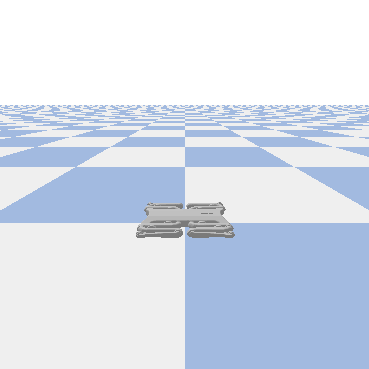

In [7]:
i